In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3Dplt.rcParams['figure.figsize'] = (20, 20)
plt.style.use('ggplot')

In [92]:
dataSet = pd.read_csv("https://raw.githubusercontent.com/JohamSMC/electiva4/master/dataSets/dataSet-olive.txt",sep="\t")
print("Fila y Columnas DataSet = ",dataSet.shape)
dataSet

Fila y Columnas DataSet =  (572, 10)


,Region,Area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1,North-Apulia,1075,75,226,7823,672,36,60,29
1,1,North-Apulia,1088,73,224,7709,781,31,61,29
2,1,North-Apulia,911,54,246,8113,549,31,63,29
3,1,North-Apulia,966,57,240,7952,619,50,78,35
4,1,North-Apulia,1051,67,259,7771,672,50,80,46
...,...,...,...,...,...,...,...,...,...,...
567,3,West-Liguria,1280,110,290,7490,790,10,10,2
568,3,West-Liguria,1060,100,270,7740,810,10,10,3
569,3,West-Liguria,1010,90,210,7720,970,0,0,2
570,3,West-Liguria,990,120,250,7750,870,10,10,2


In [21]:
print("Valores nulos en dataSet \n")
print(dataSet.isnull().sum())
print("\n\tInformación DataSet\n")
dataSet_train.info()

Valores nulos en dataSet 

Region         0
Area           0
palmitic       0
palmitoleic    0
stearic        0
oleic          0
linoleic       0
linolenic      0
arachidic      0
eicosenoic     0
dtype: int64

	Información DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Region       572 non-null    int64 
 1   Area         572 non-null    object
 2   palmitic     572 non-null    int64 
 3   palmitoleic  572 non-null    int64 
 4   stearic      572 non-null    int64 
 5   oleic        572 non-null    int64 
 6   linoleic     572 non-null    int64 
 7   linolenic    572 non-null    int64 
 8   arachidic    572 non-null    int64 
 9   eicosenoic   572 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 44.8+ KB


In [22]:
print("\tValores deL ATRIBUTO Region\n")
dataSet.Region.value_counts()

	Valores deL ATRIBUTO Region



1    323
3    151
2     98
Name: Region, dtype: int64

In [23]:
print("\t\nValores deL ATRIBUTO Area\n")
dataSet.Area.value_counts()

	
Valores deL ATRIBUTO Area



South-Apulia       206
Inland-Sardinia     65
Calabria            56
Umbria              51
West-Liguria        50
East-Liguria        50
Sicily              36
Coast-Sardinia      33
North-Apulia        25
Name: Area, dtype: int64

In [93]:
dataSet = dataSet.drop(['Region','Area'],axis=1)
#dataSetEvaluation = dataSet.copy()

# **Hallar el valor óptimo de K**

In [94]:
X = dataSet

## ***Método del Codo***

In [26]:
inercia = []
for i in range(1, 10):
  algoritmo = KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10)
  algoritmo.fit(X)
  inercia.append(algoritmo.inertia_)

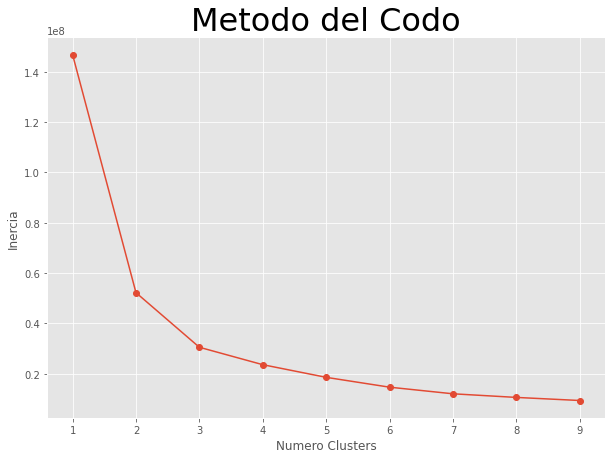

In [32]:
plt.figure(figsize=[10,7])
plt.title('Método del Codo',{'fontsize': 32})
plt.xlabel('Numero Clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1,10)),inercia, marker='o',)

## ***Método de la Silueta***

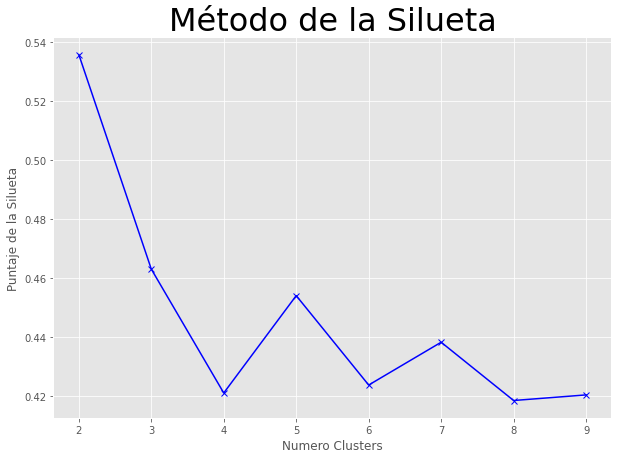

In [39]:
silueta = []
K = range(2,10)
for i in K:
  kmeans= KMeans(n_clusters=i).fit(X)
  labels = kmeans.labels_
  silueta.append(silhouette_score(X,labels,metric='euclidean'))

plt.figure(figsize=[10,7])
plt.title('Método de la Silueta',{'fontsize': 32})
plt.xlabel('Numero Clusters')
plt.ylabel('Puntaje de la Silueta')
plt.plot(K,silueta, 'bx-')
#plt.plot(K,silueta, 'bx--')



# ***Elección de clusters = 3***

In [100]:
algoritmo = KMeans(n_clusters=3, init='k-means++',max_iter=300, n_init=10)
algoritmo.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [101]:
#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [ ]:
print(etiquetas)

In [102]:
#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
prediccion = algoritmo.predict(X)
for i, pred in enumerate(prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 1
Muestra 1 se encuentra en el clúster: 1
Muestra 2 se encuentra en el clúster: 1
Muestra 3 se encuentra en el clúster: 1
Muestra 4 se encuentra en el clúster: 1
Muestra 5 se encuentra en el clúster: 1
Muestra 6 se encuentra en el clúster: 1
Muestra 7 se encuentra en el clúster: 1
Muestra 8 se encuentra en el clúster: 1
Muestra 9 se encuentra en el clúster: 1
Muestra 10 se encuentra en el clúster: 1
Muestra 11 se encuentra en el clúster: 1
Muestra 12 se encuentra en el clúster: 1
Muestra 13 se encuentra en el clúster: 1
Muestra 14 se encuentra en el clúster: 1
Muestra 15 se encuentra en el clúster: 1
Muestra 16 se encuentra en el clúster: 1
Muestra 17 se encuentra en el clúster: 2
Muestra 18 se encuentra en el clúster: 1
Muestra 19 se encuentra en el clúster: 1
Muestra 20 se encuentra en el clúster: 1
Muestra 21 se encuentra en el clúster: 1
Muestra 22 se encuentra en el clúster: 1
Muestra 23 se encuentra en el clúster: 1
Muestra 24 se encuentra en

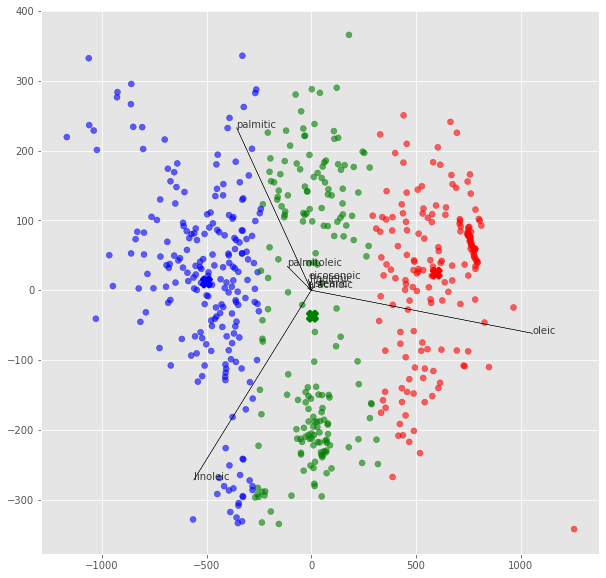

In [103]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 

#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Se define los colores de cada clúster
colores = ['blue', 'red', 'green']
#colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown']

#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.6)

#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'X', s = 100, linewidths = 3, c = colores,)

#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = dataSet.columns
#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)

plt.rcParams['figure.figsize'] = (10, 10)
plt.show()